In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error

# EDA

In [3]:
data=pd.read_csv("traffic_accidents.csv")
data.head(5)

,accidents,traffic_fine_amount,traffic_density,traffic_lights,pavement_quality,urban_area,average_speed,rain_intensity,vehicle_count,time_of_day
0,20,4.3709,2.3049,0.0753,0.7700,1,32.1592,1.1944,29.0857,16.0432
1,11,9.5564,3.2757,0.5452,4.0540,1,47.8623,0.6296,93.1812,8.9108
2,19,7.5879,2.0989,0.6697,0.3450,0,36.4476,2.8584,83.0086,5.5727
3,23,6.3879,4.9188,0.9412,0.4729,0,20.9200,2.1065,81.3159,13.1452
4,23,2.4042,0.1961,0.7393,1.7111,1,37.3780,1.7028,1.4663,0.6961


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8756 entries, 0 to 8755
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   accidents            8756 non-null   int64  
 1   traffic_fine_amount  8756 non-null   float64
 2   traffic_density      8756 non-null   float64
 3   traffic_lights       8756 non-null   float64
 4   pavement_quality     8756 non-null   float64
 5   urban_area           8756 non-null   int64  
 6   average_speed        8756 non-null   float64
 7   rain_intensity       8756 non-null   float64
 8   vehicle_count        8756 non-null   float64
 9   time_of_day          8756 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 684.2 KB


<Axes: >

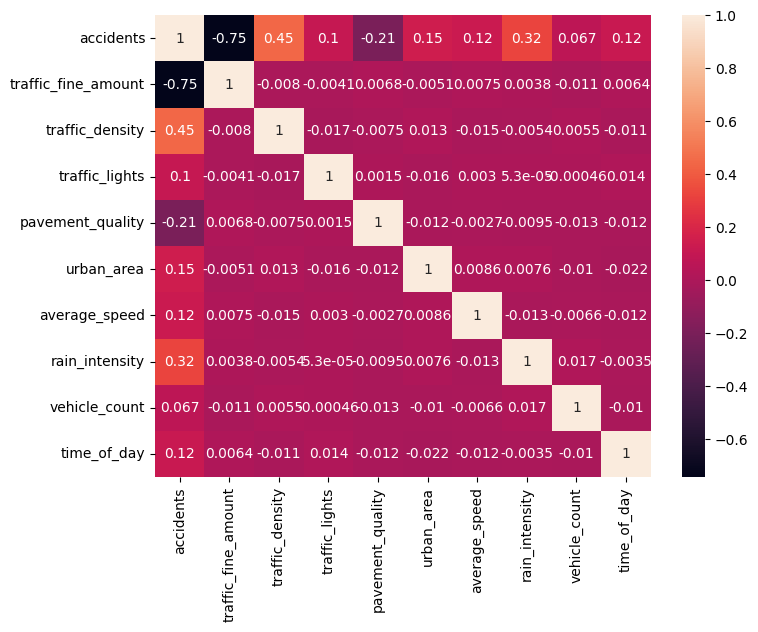

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True)

# Feature Engineering

In [17]:
x=data.drop(["accidents"],axis=1)
y=data["accidents"]
ss=StandardScaler()
x=ss.fit_transform(x)

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Models

In [19]:
models={
    "Linear Regression":LinearRegression(),
    "Random Forest Regression":RandomForestRegressor(),
    "Decision Tree Regression":DecisionTreeRegressor(),
    "Ridge Regression":Ridge(),
    "Lasso Regression":Lasso(),
    "Support Vector Regression":SVR(),
    "XGBoost Regression":XGBRegressor(),
    "KNN Regression":KNeighborsRegressor(),
    "MLP Regression":MLPRegressor()
}

In [24]:
results={}
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    mse=mean_squared_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    print(f"{name}")
    print("R2 score :",r2*100)
    print("MSE :",mse)
    print("-"*60)

Linear Regression
R2 score : 96.16338605570283
MSE : 1.0384247388913126
------------------------------------------------------------
Random Forest Regression
R2 score : 92.5124717973359
MSE : 2.0265876712328765
------------------------------------------------------------
Decision Tree Regression
R2 score : 80.38378069069547
MSE : 5.309360730593608
------------------------------------------------------------
Ridge Regression
R2 score : 96.16323284590499
MSE : 1.0384662069270911
------------------------------------------------------------
Lasso Regression
R2 score : 74.65328386476384
MSE : 6.8603871712472895
------------------------------------------------------------
Support Vector Regression
R2 score : 95.27396658581826
MSE : 1.279156591037286
------------------------------------------------------------
XGBoost Regression
R2 score : 93.97337436676025
MSE : 1.63117664263653
------------------------------------------------------------
KNN Regression
R2 score : 89.0881353263744
MSE : 2.95

In [27]:
final_result={
    "Model":["Linear Regression","Random Forest Regression","Decision Tree Regressor","Ridge Regression","Lasso Regression","Support Vector Regression","XGBoost Regression","KNN Regression","MLP Regression"],
    "R2 Score":[96.16,92.51,80.38,96.16,74.65,95.27,93.97,89.08,95.85],
    "MSE":[1.03,2.02,5.3,1.03,6.86,1.27,1.63,2.95,1.12]
}

In [28]:
Result=pd.DataFrame(final_result)

# Accuracy

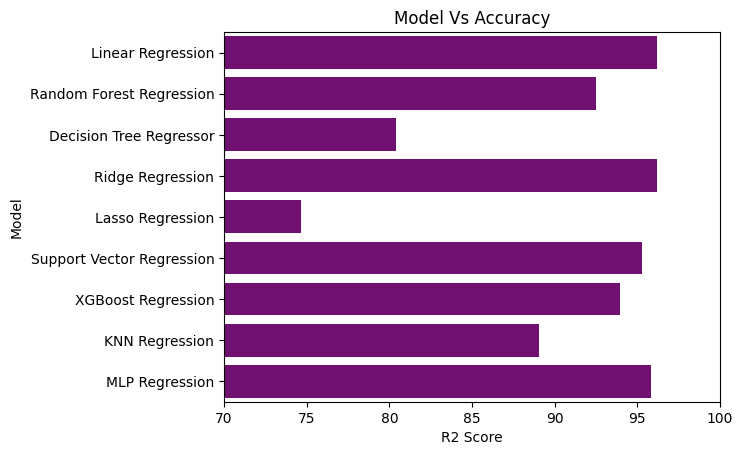

In [37]:
sns.barplot(y="Model",x="R2 Score",data=Result,color="purple")
plt.xlim(70,100)
plt.title("Model Vs Accuracy")
plt.show()